In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hackathon-qualification/Starter Notebook.ipynb
/kaggle/input/hackathon-qualification/archive/sample_submission.csv
/kaggle/input/hackathon-qualification/archive/train.csv
/kaggle/input/hackathon-qualification/archive/test.csv


In [74]:
# Importing some libraries that will aid the data exploration and manipulation

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Machine Learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import warnings

warnings.filterwarnings("ignore")


In [35]:
# importing the training, testing and submission format datasets datasets 

train_df = pd.read_csv("/kaggle/input/hackathon-qualification/archive/train.csv", index_col="id")
test_df = pd.read_csv("/kaggle/input/hackathon-qualification/archive/test.csv")

submission_csv = pd.read_csv("/kaggle/input/hackathon-qualification/archive/sample_submission.csv")


In [36]:
#checking the head of the dataset

train_df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [43]:
# checking the general info of the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 18.7+ MB


In [44]:
train_df.describe()

,model_year,milage,price
count,188533.000000,188533.000000,1.885330e+05
mean,2015.829998,65705.295174,4.387802e+04
std,5.660967,49798.158076,7.881952e+04
min,1974.000000,100.000000,2.000000e+03
25%,2013.000000,24115.000000,1.700000e+04
50%,2017.000000,57785.000000,3.082500e+04
75%,2020.000000,95400.000000,4.990000e+04
max,2024.000000,405000.000000,2.954083e+06


In [45]:
# percentage of null values

(train_df.isna().sum()) / len(train_df) * 100

brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        2.696080
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         1.300568
clean_title     11.360876
price            0.000000
dtype: float64

In [40]:
# checking the value counts in the fuel type 

train_df["fuel_type"].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

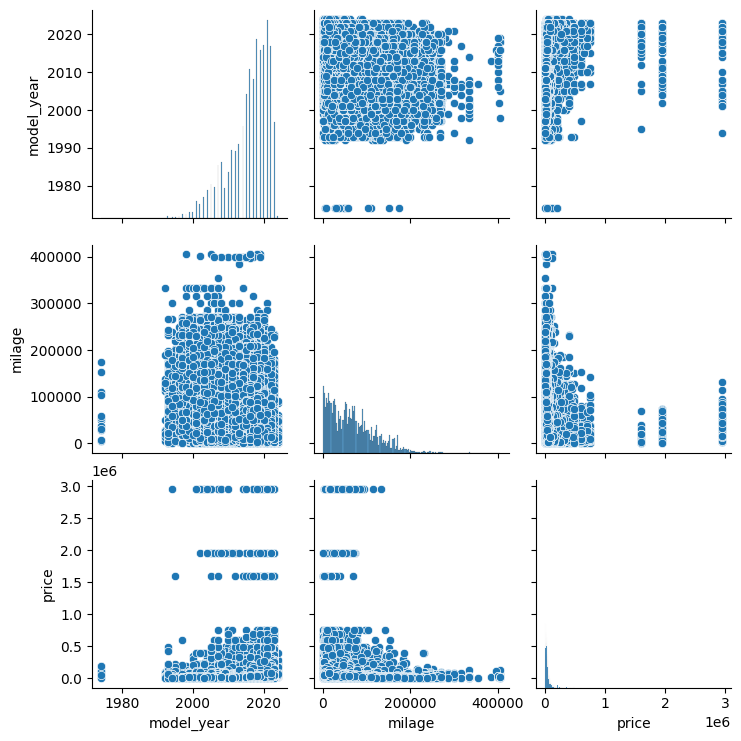

In [41]:
# checking some plots

sns.pairplot(train_df[["model_year", "milage", "price"]]);

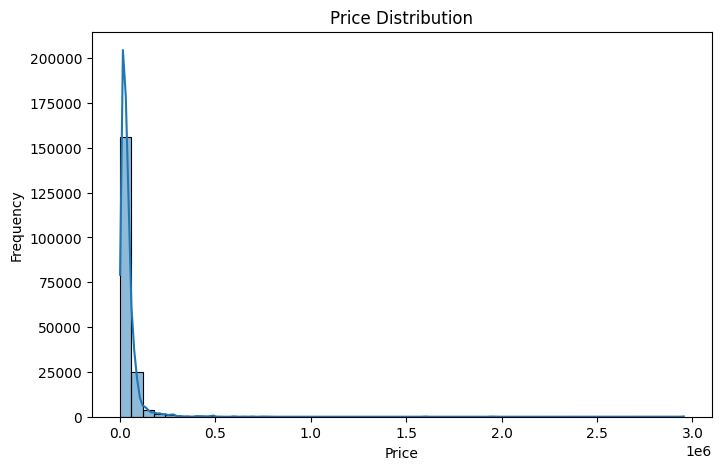

In [42]:
#checking the distribution of the data 

plt.figure(figsize=(8,5))
sns.histplot(train_df["price"], bins=50, kde=True)
plt.title("Price Distribution")
plt.ylabel("Frequency")
plt.xlabel("Price");

The dataset is right-skewed

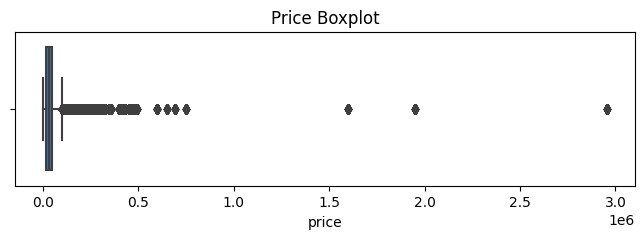

In [46]:
plt.figure(figsize=(8,2))
sns.boxplot(x=train_df["price"])
plt.title("Price Boxplot")
plt.show()

In [47]:
# categorical features

train_df.select_dtypes(include=object).columns.tolist()


['brand',
 'model',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title']

In [48]:
train_df["model_year"].head()

id
0    2007
1    2002
2    2002
3    2017
4    2021
Name: model_year, dtype: int64

In [49]:
# getting current date for some feature engineering jobs

current_year = datetime.now().year
print(current_year)

2025


In [50]:
train_df["car_age"] = current_year - train_df["model_year"]
train_df["car_age"].head()

id
0    18
1    23
2    23
3     8
4     4
Name: car_age, dtype: int64

This shows that the feature fuel_type has a strong relationship with the price target

In [51]:
# numerical features

train_df.select_dtypes(exclude=object).columns.tolist()


['model_year', 'milage', 'price', 'car_age']

Accident feature also has strong relationship with price

In [52]:
train_df[train_df.select_dtypes(exclude=object).columns.tolist()].corr()

,model_year,milage,price,car_age
model_year,1.000000,-0.669936,0.231795,-1.000000
milage,-0.669936,1.000000,-0.283067,0.669936
price,0.231795,-0.283067,1.000000,-0.231795
car_age,-1.000000,0.669936,-0.231795,1.000000


In [53]:
train_df["milage"].describe()

count    188533.000000
mean      65705.295174
std       49798.158076
min         100.000000
25%       24115.000000
50%       57785.000000
75%       95400.000000
max      405000.000000
Name: milage, dtype: float64

In [54]:
train_df[train_df.select_dtypes(include=object).columns.tolist()].head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
id,,,,,,,,,
0,MINI,Cooper S Base,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes
1,Lincoln,LS V8,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes
2,Chevrolet,Silverado 2500 LT,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes
3,Genesis,G90 5.0 Ultimate,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes
4,Mercedes-Benz,Metris Base,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes


In [55]:
train_df[train_df.select_dtypes(include=object).columns.tolist()].nunique()

brand             57
model           1897
fuel_type          7
engine          1117
transmission      52
ext_col          319
int_col          156
accident           2
clean_title        1
dtype: int64

In [56]:
(train_df["clean_title"] == "nan").sum()

0

In [57]:
train_df["accident"].values

array(['None reported', 'At least 1 accident or damage reported',
       'None reported', ..., 'None reported', 'None reported',
       'None reported'], dtype=object)

In [58]:
# checking some correlations

train_df["accident"] = train_df["accident"].apply(lambda x: 1 if x == "At least 1 accident or damage reported" else 0).astype(int)
train_df["accident"].corr(train_df["price"])

-0.12512249069074638

In [60]:
# checking categorical features 

categorical_features = train_df.select_dtypes(include=object).columns.tolist()
train_df[categorical_features].nunique()

brand             57
model           1897
fuel_type          7
engine          1117
transmission      52
ext_col          319
int_col          156
clean_title        1
dtype: int64

In [61]:
train_df["ext_col"].head()

id
0    Yellow
1    Silver
2      Blue
3     Black
4     Black
Name: ext_col, dtype: object

In [62]:
numerical_features = train_df.select_dtypes(exclude=object).columns.tolist()

train_df[numerical_features].isna().sum()

model_year    0
milage        0
accident      0
price         0
car_age       0
dtype: int64

In [63]:
train_df.isna().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident            0
clean_title     21419
price               0
car_age             0
dtype: int64

In [64]:
import re

def extract_engine_features(df):
    df = df.copy()
    
    # Extract horsepower
    df["engine_hp"] = df["engine"].str.extract(r"(\d+\.?\d*)HP").astype(float)
    
    # Extract liters
    df["engine_L"] = df["engine"].str.extract(r"(\d+\.?\d*)L").astype(float)
    
    # Extract cylinders
    df["engine_cyl"] = df["engine"].str.extract(r"(\d+) Cylinder").astype(float)
    
    # Extract fuel type (Gasoline, Diesel, Hybrid, etc.)
    df["engine_fuel"] = df["engine"].str.extract(r"(Gasoline|Diesel|Hybrid|Flex Fuel|Electric)").fillna("Other")
    
    return df





In [65]:
# Group car models: keep top 3, rest -> "Other"
def group_top_models(df, top_n=50):
    df = df.copy()
    top_models = df["model"].value_counts().nlargest(top_n).index
    df["model"] = df["model"].where(df["model"].isin(top_models), "Other")
    
    return df






In [66]:


def normalize_color(color):
    c = str(color).lower()

    if "black" in c: return "Black"
    elif "white" in c: return "White"
    elif "gray" in c or "grey" in c or "granite" in c or "graphite" in c: return "Gray"
    elif "silver" in c: return "Silver"
    elif "blue" in c or "aqua" in c or "navy" in c or "teal" in c: return "Blue"
    elif "red" in c or "maroon" in c or "crimson" in c: return "Red"
    elif "green" in c: return "Green"
    elif "yellow" in c or "gold" in c or "champagne" in c: return "Yellow/Gold"
    elif "orange" in c or "copper" in c or "mango" in c: return "Orange"
    elif "brown" in c or "bronze" in c: return "Brown"
    elif "purple" in c or "violet" in c or "plum" in c: return "Purple"
    elif "beige" in c or "tan" in c or "sand" in c or "ivory" in c: return "Beige"
    else: return "Other"




In [67]:
def normalize_int_color(color):
    c = str(color).lower()

    if "black" in c: return "Black"
    elif "beige" in c or "tan" in c or "ivory" in c or "cream" in c or "sand" in c: return "Beige"
    elif "gray" in c or "grey" in c or "graphite" in c or "charcoal" in c: return "Gray"
    elif "brown" in c or "choco" in c or "espresso" in c or "mocha" in c: return "Brown"
    elif "red" in c or "maroon" in c or "crimson" in c: return "Red"
    elif "white" in c: return "White"
    elif "blue" in c or "navy" in c or "cobalt" in c: return "Blue"
    elif "green" in c: return "Green"
    elif "orange" in c: return "Orange"
    elif "purple" in c or "plum" in c or "violet" in c: return "Purple"
    else: return "Other"






In [68]:
# The preprocessing function

def preprocessor(path):
    df = pd.read_csv(path, index_col="id")
   

    # get the current date 
    current_year = datetime.now().year

    # create another feature - "car age"
    df["car_age"] = current_year - df["model_year"]

    # drop the "clean title"
    df.drop(columns=["clean_title"], inplace=True)
    
    # fill nan values in accident features with the mode
    df["accident"] = df["accident"].fillna(df["accident"].mode()[0])


    # encode the accident feature
    df["accident"] = df["accident"].apply(lambda x: 1 if x == "At least 1 accident or damage reported" else 0).astype(int)
    

    fuel_map = {
    "Gasoline": "Conventional",
    "Diesel": "Conventional",
    "E85 Flex Fuel": "Conventional",
    "Hybrid": "Hybrid/Electric",
    "Plug-In Hybrid": "Hybrid/Electric",
    "–": "Other",
    "not supported": "Other",
        np.nan: "Other"
}

    # grouping the various values of fuel type into 3 groups for easier encoding and handling nan
    df["fuel_type_grouped"] = df["fuel_type"].map(fuel_map)
    df.drop(columns=["fuel_type"], inplace=True)

    df = group_top_models(df, top_n=50)


    df = extract_engine_features(df)

    df["ext_col_grouped"] = df["ext_col"].apply(normalize_color)

    df["int_col_grouped"] = df["int_col"].apply(normalize_int_color)
    
    df.drop(columns=["model","engine","transmission","ext_col","int_col"], inplace=True)

    df.fillna(method="ffill", inplace=True)

    

    
    

    return df


    

In [69]:
train_df = preprocessor("/kaggle/input/hackathon-qualification/archive/train.csv")

In [70]:
train_df.isnull().sum()

brand                0
model_year           0
milage               0
accident             0
price                0
car_age              0
fuel_type_grouped    0
engine_hp            0
engine_L             0
engine_cyl           0
engine_fuel          0
ext_col_grouped      0
int_col_grouped      0
dtype: int64

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Params: {'regressor__subsample': 0.8, 'regressor__n_estimators': 200, 'regressor__max_depth': 8, 'regressor__learning_rate': 0.05, 'regressor__colsample_bytree': 1.0}
Validation RMSE: 68884.33068899014


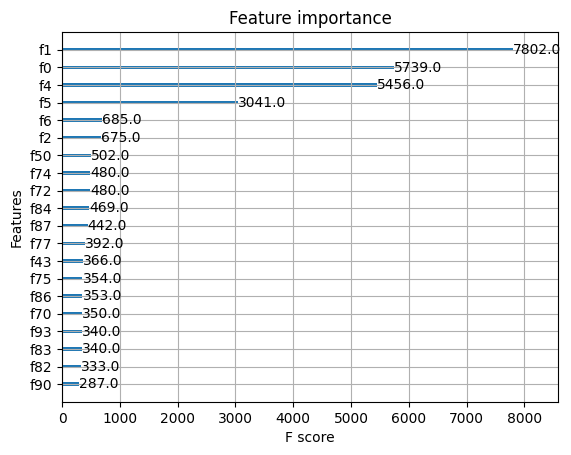

In [76]:


# 1. Train/Test Split
X = train_df.drop(columns=["price"])
y = train_df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



# Log-transform target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# 2. Feature Types

categorical_features = X_train.select_dtypes(include=object).columns.tolist()

numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()


# 3. Preprocessing
model_preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features)
    ]
)


# 4. Pipeline
pipe = Pipeline(steps=[
    ("preprocessor", model_preprocessor),
    ("regressor", XGBRegressor(
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1
    ))
])


# 5. Randomized Search Parameters
param_dist = {
    "regressor__n_estimators": [100, 200, 300],
    "regressor__max_depth": [6, 8, 10],
    "regressor__learning_rate": [0.05, 0.1, 0.2],
    "regressor__subsample": [0.7, 0.8, 1.0],
    "regressor__colsample_bytree": [0.7, 0.8, 1.0]
}

search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=15,          # try 15 random combinations
    scoring="neg_root_mean_squared_error",
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)


# 6. Fit Model
search.fit(X_train, y_train_log)

print("Best Params:", search.best_params_)


# 7. Evaluate
y_pred_log = search.best_estimator_.predict(X_test)
y_pred = np.expm1(y_pred_log)  # back-transform

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Validation RMSE:",rmse)

# 8. Feature Importance
best_xgb = search.best_estimator_.named_steps["regressor"]
xgb.plot_importance(best_xgb, max_num_features=20)
plt.show()


# 9. Predict on New Data
def predict_new(df_new, trained_pipeline=search.best_estimator_):
    """
    df_new: new dataframe with same columns as X_train
    trained_pipeline: the pipeline returned from RandomizedSearchCV
    """
    # Apply same preprocessing logic (ensure same groupings if needed)
    y_pred_log_new = trained_pipeline.predict(df_new)
    y_pred_new = np.expm1(y_pred_log_new)
    return y_pred_new




In [77]:
# test data before processing

test_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [99]:
 X_test = preprocessor("/kaggle/input/hackathon-qualification/archive/test.csv")

In [100]:
# test data after processing

X_test.head()

,brand,model_year,milage,accident,car_age,fuel_type_grouped,engine_hp,engine_L,engine_cyl,engine_fuel,ext_col_grouped,int_col_grouped
id,,,,,,,,,,,,
188533,Land,2015,98000,0,10,Conventional,240.0,2.0,4.0,Gasoline,White,Beige
188534,Land,2020,9142,0,5,Hybrid/Electric,395.0,3.0,6.0,Gasoline,Silver,Black
188535,Ford,2022,28121,0,3,Conventional,395.0,3.5,6.0,Other,White,Other
188536,Audi,2016,61258,0,9,Conventional,395.0,3.5,6.0,Other,Yellow/Gold,Black
188537,Audi,2018,59000,0,7,Conventional,252.0,2.0,4.0,Gasoline,Gray,Black


In [101]:
# predicting the test data with the best estimator

y_pred_log = search.best_estimator_.predict(X_test)
y_pred = np.expm1(y_pred_log)  # back-transform

y_pred[0:5]  # first 5 predictions

array([16408.41 , 60358.566, 48369.938, 27679.625, 29591.287],
      dtype=float32)

In [102]:
# Final submission

submission = pd.DataFrame({
    "id": X_test.index,
    "Price": y_pred
})
submission.to_csv("Submission.csv", index=False)
